<a href="https://colab.research.google.com/github/fadhluibnu/ANOMALY_IOT_NETWORK_DETECTION/blob/main/Machine_Learning_Kelompok_2(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install yellowbrick

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler

if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [4]:

df = pd.read_csv('/content/drive/MyDrive/SEMESTER 4/AI/SpotifyAudioFeaturesApril2019.csv')
df.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       130663 non-null  object 
 1   track_id          130663 non-null  object 
 2   track_name        130662 non-null  object 
 3   acousticness      130663 non-null  float64
 4   danceability      130663 non-null  float64
 5   duration_ms       130663 non-null  int64  
 6   energy            130663 non-null  float64
 7   instrumentalness  130663 non-null  float64
 8   key               130663 non-null  int64  
 9   liveness          130663 non-null  float64
 10  loudness          130663 non-null  float64
 11  mode              130663 non-null  int64  
 12  speechiness       130663 non-null  float64
 13  tempo             130663 non-null  float64
 14  time_signature    130663 non-null  int64  
 15  valence           130663 non-null  float64
 16  popularity        13

In [6]:
df = df.drop(df.columns[0:3], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      130663 non-null  float64
 1   danceability      130663 non-null  float64
 2   duration_ms       130663 non-null  int64  
 3   energy            130663 non-null  float64
 4   instrumentalness  130663 non-null  float64
 5   key               130663 non-null  int64  
 6   liveness          130663 non-null  float64
 7   loudness          130663 non-null  float64
 8   mode              130663 non-null  int64  
 9   speechiness       130663 non-null  float64
 10  tempo             130663 non-null  float64
 11  time_signature    130663 non-null  int64  
 12  valence           130663 non-null  float64
 13  popularity        130663 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 14.0 MB


In [7]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,130663.000000,130663.000000,1.306630e+05,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000
mean,0.342500,0.581468,2.126331e+05,0.569196,0.224018,5.231894,0.194886,-9.974006,0.607739,0.112015,119.473353,3.878986,0.439630,24.208988
std,0.345641,0.190077,1.231551e+05,0.260312,0.360328,3.602701,0.167733,6.544379,0.488256,0.124327,30.159636,0.514403,0.259079,19.713191
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,1.639225e+05,0.396000,0.000000,2.000000,0.097500,-11.898000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000
50%,0.203000,0.605000,2.019010e+05,0.603000,0.000149,5.000000,0.124000,-7.979000,1.000000,0.055900,120.027000,4.000000,0.420000,22.000000
75%,0.636000,0.727000,2.410475e+05,0.775000,0.440000,8.000000,0.236000,-5.684000,1.000000,0.129000,139.642000,4.000000,0.638000,38.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


# DATA PREPOCESSING

In [8]:
df_cleaned = df.dropna()
print(f"Jumlah baris setelah menghapus data yang hilang: {len(df_cleaned)}")


Jumlah baris setelah menghapus data yang hilang: 130663


In [9]:
df = df_cleaned.copy()

In [10]:
df = df.drop_duplicates()
print(len(df))

129970


In [11]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


In [12]:
from sklearn.preprocessing import LabelEncoder

# Cek nama kolom dalam dataset
print("Kolom dalam dataset:", df.columns)

LE = LabelEncoder()
mapping_dict = {}

# Pastikan hanya kolom kategori yang ada dalam dataset yang diproses
object_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# Sesuaikan nama kolom jika ada perbedaan dalam dataset
object_cols = list(set(df.columns).intersection(object_cols))

for col in object_cols:
    df[col] = LE.fit_transform(df[col])
    mapping_dict[col] = dict(zip(LE.classes_, LE.transform(LE.classes_)))

print("Semua fitur kategori telah diubah menjadi numerik.")
print("Mapping label untuk setiap kolom:", mapping_dict)


Kolom dalam dataset: Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'popularity'],
      dtype='object')
Semua fitur kategori telah diubah menjadi numerik.
Mapping label untuk setiap kolom: {}


In [13]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129970 entries, 0 to 130662
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      129970 non-null  float64
 1   danceability      129970 non-null  float64
 2   duration_ms       129970 non-null  int64  
 3   energy            129970 non-null  float64
 4   instrumentalness  129970 non-null  float64
 5   key               129970 non-null  int64  
 6   liveness          129970 non-null  float64
 7   loudness          129970 non-null  float64
 8   mode              129970 non-null  int64  
 9   speechiness       129970 non-null  float64
 10  tempo             129970 non-null  float64
 11  time_signature    129970 non-null  int64  
 12  valence           129970 non-null  float64
 13  popularity        129970 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 14.9 MB


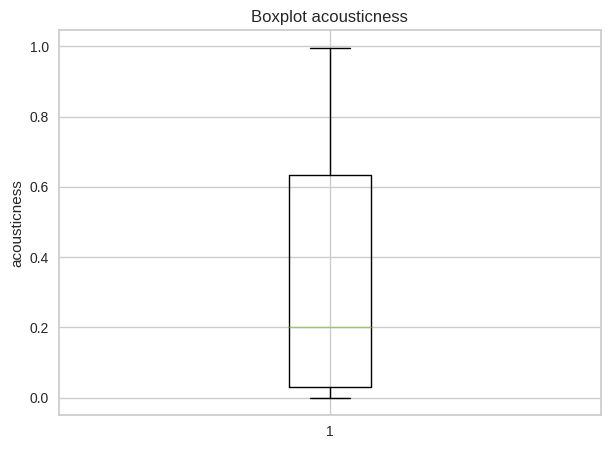

In [15]:
plt.figure(figsize=(7, 5))
plt.boxplot(df["acousticness"])
plt.title('Boxplot acousticness')
plt.ylabel('acousticness')
plt.show()


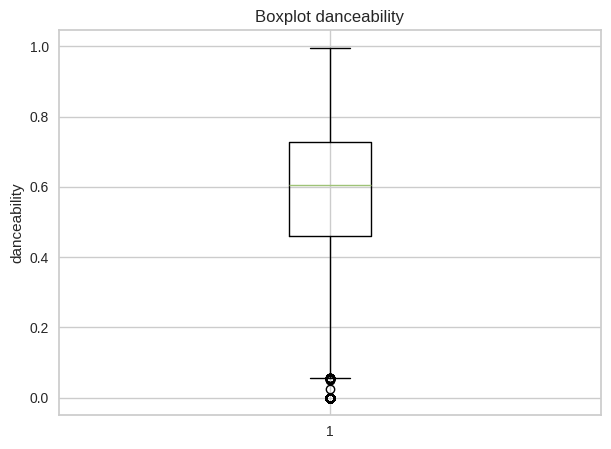

In [16]:
plt.figure(figsize=(7, 5))
plt.boxplot(df["danceability"])
plt.title('Boxplot danceability')
plt.ylabel('danceability')
plt.show()


0         0.743
1         0.846
2         0.603
3         0.800
4         0.783
          ...  
130658    0.601
130659    0.387
130660    0.717
130661    0.772
130662    0.715
Name: danceability, Length: 129679, dtype: float64


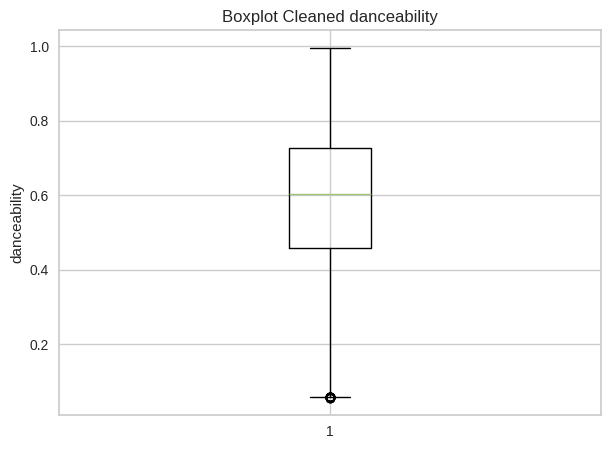

In [17]:
X_cleaned_danceability = df["danceability"].copy()
Q1 = X_cleaned_danceability.quantile(0.25)
Q3 = X_cleaned_danceability.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = X_cleaned_danceability[(X_cleaned_danceability < lower_bound) | (X_cleaned_danceability > upper_bound)]
X_cleaned_danceability = X_cleaned_danceability.drop(outliers.index)
print(X_cleaned_danceability)
plt.figure(figsize=(7, 5))
plt.boxplot(X_cleaned_danceability)
plt.title('Boxplot Cleaned danceability')
plt.ylabel('danceability')
plt.show()


In [18]:
df["danceability"] = X_cleaned_danceability
df = df.dropna()
print(f"Jumlah baris setelah menghapus outlier dan data yang hilang: {len(df)}")


Jumlah baris setelah menghapus outlier dan data yang hilang: 129679


In [19]:
df.head()


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [20]:
df = df.drop(df.columns[[2,5,8,11]], axis=1)
df.head()


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.005820,0.743,0.339,0.000,0.0812,-7.678,0.4090,203.927,0.118,15
1,0.024400,0.846,0.557,0.000,0.2860,-7.259,0.4570,159.009,0.371,0
2,0.025000,0.603,0.723,0.000,0.0824,-5.890,0.0454,114.966,0.382,56
3,0.029400,0.800,0.579,0.912,0.0994,-12.118,0.0701,123.003,0.641,0
4,0.000035,0.783,0.792,0.878,0.0332,-10.277,0.0661,120.047,0.928,0


In [21]:

min_max_scaler = MinMaxScaler()
scaled_min_max = min_max_scaler.fit_transform(df)
print("Standart Scaling:\n", scaled_min_max)

Standart Scaling:
 [[0.00584337 0.73056443 0.33898658 ... 0.78909674 0.118      0.15      ]
 [0.02449799 0.84025559 0.55699101 ... 0.58340469 0.371      0.        ]
 [0.0251004  0.58146965 0.72299438 ... 0.38171952 0.382      0.56      ]
 ...
 [0.3313253  0.7028754  0.5319905  ... 0.5740996  0.546      0.47      ]
 [0.00793173 0.76144835 0.50999005 ... 0.40499599 0.0755     0.5       ]
 [0.55120482 0.70074547 0.7339946  ... 0.45115054 0.976      0.55      ]]


In [22]:
df = pd.DataFrame(scaled_min_max, columns=df.columns)

In [23]:
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.005843,0.730564,0.338987,0.000,0.070770,0.843141,0.409895,0.789097,0.118,0.15
1,0.024498,0.840256,0.556991,0.000,0.278121,0.850071,0.460748,0.583405,0.371,0.00
2,0.025100,0.581470,0.722994,0.000,0.071985,0.872713,0.024685,0.381720,0.382,0.56
3,0.029518,0.791267,0.578991,0.912,0.089197,0.769707,0.050853,0.418523,0.641,0.00
4,0.000035,0.773163,0.791996,0.878,0.022173,0.800155,0.046615,0.404987,0.928,0.00


### KMEANS

In [24]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init=10)
kmeans.fit(df)
df['Cluster'] = kmeans.labels_
labels = kmeans.labels_
k = 6
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        mean_acousticness = cluster_data[:, 0].mean()
        mean_danceability = cluster_data[:, 1].mean()
        mean_energy = cluster_data[:, 2].mean()
        mean_instrumentalness = cluster_data[:, 3].mean()
        mean_liveness = cluster_data[:, 4].mean()
        mean_loudness = cluster_data[:, 5].mean()
        mean_speechiness = cluster_data[:, 6].mean()
        mean_tempo = cluster_data[:, 7].mean()
        mean_valence = cluster_data[:, 8].mean()
        mean_popularity = cluster_data[:, 9].mean()
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata acousticness: {mean_acousticness:.2f}")
        print(f"Rata-rata danceability: {mean_danceability:.2f}")
        print(f"Rata-rata energy: {mean_energy:.2f}")
        print(f"Rata-rata instrumentalness: {mean_instrumentalness:.2f}")
        print(f"Rata-rata liveness: {mean_liveness:.2f}")
        print(f"Rata-rata loudness: {mean_loudness:.2f}")
        print(f"Rata-rata speechiness: {mean_speechiness:.2f}")
        print(f"Rata-rata tempo: {mean_tempo:.2f}")
        print(f"Rata-rata valence: {mean_valence:.2f}")
        print(f"Rata-rata popularity: {mean_popularity:.2f}")
df_array = df.values
analyze_clusters(df_array, labels, k)


Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata acousticness: 0.11
Rata-rata danceability: 0.57
Rata-rata energy: 0.68
Rata-rata instrumentalness: 0.80
Rata-rata liveness: 0.19
Rata-rata loudness: 0.80
Rata-rata speechiness: 0.06
Rata-rata tempo: 0.43
Rata-rata valence: 0.41
Rata-rata popularity: 0.16

Cluster 2:
Rata-rata acousticness: 0.89
Rata-rata danceability: 0.35
Rata-rata energy: 0.20
Rata-rata instrumentalness: 0.86
Rata-rata liveness: 0.14
Rata-rata loudness: 0.63
Rata-rata speechiness: 0.04
Rata-rata tempo: 0.34
Rata-rata valence: 0.26
Rata-rata popularity: 0.18

Cluster 3:
Rata-rata acousticness: 0.56
Rata-rata danceability: 0.65
Rata-rata energy: 0.56
Rata-rata instrumentalness: 0.02
Rata-rata liveness: 0.18
Rata-rata loudness: 0.83
Rata-rata speechiness: 0.14
Rata-rata tempo: 0.39
Rata-rata valence: 0.64
Rata-rata popularity: 0.24

Cluster 4:
Rata-rata acousticness: 0.11
Rata-rata danceability: 0.67
Rata-rata energy: 0.75
Rata-rata instrumentalness: 0.02
Rata

In [ ]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(df_array, labels)
print("Silhouette Score:", sil_score)


In [ ]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_array)
visualizer.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(df)
df['Cluster'] = kmeans.labels_
labels = kmeans.labels_
k = 3
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        mean_acousticness = cluster_data[:, 0].mean()
        mean_danceability = cluster_data[:, 1].mean()
        mean_energy = cluster_data[:, 2].mean()
        mean_instrumentalness = cluster_data[:, 3].mean()
        mean_liveness = cluster_data[:, 4].mean()
        mean_loudness = cluster_data[:, 5].mean()
        mean_speechiness = cluster_data[:, 6].mean()
        mean_tempo = cluster_data[:, 7].mean()
        mean_valence = cluster_data[:, 8].mean()
        mean_popularity = cluster_data[:, 9].mean()
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata acousticness: {mean_acousticness:.2f}")
        print(f"Rata-rata danceability: {mean_danceability:.2f}")
        print(f"Rata-rata energy: {mean_energy:.2f}")
        print(f"Rata-rata instrumentalness: {mean_instrumentalness:.2f}")
        print(f"Rata-rata liveness: {mean_liveness:.2f}")
        print(f"Rata-rata loudness: {mean_loudness:.2f}")
        print(f"Rata-rata speechiness: {mean_speechiness:.2f}")
        print(f"Rata-rata tempo: {mean_tempo:.2f}")
        print(f"Rata-rata valence: {mean_valence:.2f}")
        print(f"Rata-rata popularity: {mean_popularity:.2f}")
df_array = df.values
analyze_clusters(df_array, labels, k)


In [ ]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(df_array, labels)
print("Silhouette Score:", sil_score)


In [ ]:
kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_array)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(df)
df['Cluster'] = kmeans.labels_
labels = kmeans.labels_
k = 2
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        mean_acousticness = cluster_data[:, 0].mean()
        mean_danceability = cluster_data[:, 1].mean()
        mean_energy = cluster_data[:, 2].mean()
        mean_instrumentalness = cluster_data[:, 3].mean()
        mean_liveness = cluster_data[:, 4].mean()
        mean_loudness = cluster_data[:, 5].mean()
        mean_speechiness = cluster_data[:, 6].mean()
        mean_tempo = cluster_data[:, 7].mean()
        mean_valence = cluster_data[:, 8].mean()
        mean_popularity = cluster_data[:, 9].mean()
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata acousticness: {mean_acousticness:.2f}")
        print(f"Rata-rata danceability: {mean_danceability:.2f}")
        print(f"Rata-rata energy: {mean_energy:.2f}")
        print(f"Rata-rata instrumentalness: {mean_instrumentalness:.2f}")
        print(f"Rata-rata liveness: {mean_liveness:.2f}")
        print(f"Rata-rata loudness: {mean_loudness:.2f}")
        print(f"Rata-rata speechiness: {mean_speechiness:.2f}")
        print(f"Rata-rata tempo: {mean_tempo:.2f}")
        print(f"Rata-rata valence: {mean_valence:.2f}")
        print(f"Rata-rata popularity: {mean_popularity:.2f}")
df_array = df.values
analyze_clusters(df_array, labels, k)

In [ ]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(df_array, labels)
print("Silhouette Score:", sil_score)


In [ ]:
kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_array)
visualizer.show()

In [ ]:
import seaborn as sns
sns.pairplot(df, diag_kind='kde', hue="Cluster", palette='viridis')
plt.suptitle('Visualisasi Pairplot Semua Fitur dalam Spotify audio features', y=1.02)
plt.show()


### Starfish Optimization Algorithm

In [ ]:
def fitness_function(k, data):
    if k < 2:
        return -1  # Tidak valid jika k < 2
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    return silhouette_score(data, labels)

In [ ]:
# Algoritma Starfish Optimization Algorithm (SFOA)
def starfish_optimization(data, k_range=(2, 10), n_starfish=10, n_iter=50):
    # Inisialisasi populasi
    population = np.random.randint(k_range[0], k_range[1] + 1, size=n_starfish)
    best_k = None
    best_score = -np.inf

    for _ in range(n_iter):

        scores = np.array([fitness_function(k, data) for k in population])
        best_idx = np.argmax(scores)

        if scores[best_idx] > best_score:
            best_k, best_score = population[best_idx], scores[best_idx]

        new_population = population + np.random.randint(-1, 2, size=n_starfish)
        new_population = np.clip(new_population, k_range[0], k_range[1])
        population = new_population

    return best_k, best_score

In [ ]:
optimal_k, best_silhouette = starfish_optimization(df)

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(df)


In [ ]:
final_score = silhouette_score(df, labels)

In [ ]:
print(f"Optimal K: {optimal_k}")
print(f"Best Silhouette Score: {best_silhouette}")
print(f"Final Clustering Silhouette Score: {final_score}")

### K-MEANS + Starfish Optimization Algorithm

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = df.to_numpy()

# Fungsi Objektif untuk K-Means
def evaluate_kmeans(params):
    """
    Fungsi objektif untuk optimasi k-means.
    params[0]: jumlah kluster (k)
    """
    k = int(params[0])
    if k < 2:  # Minimal kluster adalah 2
        return float('inf')

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    sse = kmeans.inertia_  # Sum of Squared Errors (SSE)
    return sse  # Meminimalkan SSE

# Starfish Optimization Algorithm
def starfish_optimization(Npop, Max_it, lb, ub, dim, fobj):
    """
    Implementasi Starfish Optimization Algorithm (SFOA) untuk optimasi K-Means.
    """
    # Inisialisasi populasi
    population = np.random.uniform(lb, ub, (Npop, dim))
    fitness = np.array([fobj(ind) for ind in population])
    best_position = population[np.argmin(fitness)]
    best_fitness = min(fitness)

    print("Iteration | Best SSE    | Silhouette Score")
    print("-----------------------------------------")

    # Iterasi SFOA
    for iteration in range(Max_it):
        new_population = population.copy()

        # Starfish arms
        for i in range(Npop):
            r = np.random.rand()
            if r < 0.3:  # Explorasi
                new_population[i] = population[i] + np.random.uniform(-1, 1, dim)
            elif r < 0.7:  # Eksploitasi
                new_population[i] = best_position + np.random.uniform(-0.5, 0.5, dim)
            else:  # Spiral movement
                spiral_step = np.random.uniform(-0.5, 0.5)
                new_population[i] += spiral_step

        # Evaluasi populasi baru
        new_population = np.clip(new_population, lb, ub)
        new_fitness = np.array([fobj(ind) for ind in new_population])

        # Pembaruan posisi terbaik
        for i in range(Npop):
            if new_fitness[i] < fitness[i]:
                population[i] = new_population[i]
                fitness[i] = new_fitness[i]

        best_candidate = population[np.argmin(fitness)]
        best_candidate_fitness = min(fitness)
        if best_candidate_fitness < best_fitness:
            best_position = best_candidate
            best_fitness = best_candidate_fitness

        # Evaluasi Silhouette Score dengan jumlah cluster terbaik saat ini
        current_k = int(best_position[0])
        if current_k >= 2:  # Silhouette Score hanya valid untuk k >= 2
            kmeans = KMeans(n_clusters=current_k, random_state=42, n_init=10)
            labels = kmeans.fit_predict(X)
            silhouette = silhouette_score(X, labels)
        else:
            silhouette = float('-inf')

        print(f"{iteration+1:9} | {best_fitness:.6f} | {silhouette:.4f}")

    return best_position, best_fitness

# Batasan Parameter
lb = [2]  # Minimal kluster
ub = [10]  # Maksimal kluster
dim = 1

# Jalankan Algoritma SFOA
best_params, best_score = starfish_optimization(
    Npop=20,
    Max_it=50,
    lb=lb,
    ub=ub,
    dim=dim,
    fobj=evaluate_kmeans
)

print("Best Parameters (k):", int(best_params[0]))
print("Best SSE:", best_score)

# Visualisasi Hasil dengan K terbaik
best_k = int(best_params[0])
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans.fit(df)

# Plot hasil clustering
plt.scatter(df[:, 0], df[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title(f"K-Means Clustering (k={best_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
